<a href="https://colab.research.google.com/github/kazukiminemura/rock_paper_scissors_colab/blob/main/rock_paper_scissors_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [101]:
# rock paper scissors model with tensorflow-v2

!git clone https://github.com/karaage0703/janken_dataset datasets
!rm -rf datasets/.git
!rm datasets/LICENSE
!ls -a datasets

fatal: destination path 'datasets' already exists and is not an empty directory.
rm: cannot remove 'datasets/LICENSE': No such file or directory
.  ..  choki  gu  pa


In [103]:
!ls datasets -a

.  ..  choki  gu  pa


In [54]:
!ls datasets/choki

choki_01.jpg  IMG_0783.JPG  IMG_0797.JPG  IMG_0811.JPG	IMG_0876.JPG
IMG_0770.JPG  IMG_0784.JPG  IMG_0798.JPG  IMG_0812.JPG	IMG_0877.JPG
IMG_0771.JPG  IMG_0785.JPG  IMG_0799.JPG  IMG_0813.JPG	IMG_0878.JPG
IMG_0772.JPG  IMG_0786.JPG  IMG_0800.JPG  IMG_0814.JPG	IMG_0879.JPG
IMG_0773.JPG  IMG_0787.JPG  IMG_0801.JPG  IMG_0815.JPG	IMG_0880.JPG
IMG_0774.JPG  IMG_0788.JPG  IMG_0802.JPG  IMG_0816.JPG	IMG_0881.JPG
IMG_0775.JPG  IMG_0789.JPG  IMG_0803.JPG  IMG_0817.JPG	IMG_0882.JPG
IMG_0776.JPG  IMG_0790.JPG  IMG_0804.JPG  IMG_0818.JPG	IMG_0883.JPG
IMG_0777.JPG  IMG_0791.JPG  IMG_0805.JPG  IMG_0870.JPG	IMG_0884.JPG
IMG_0778.JPG  IMG_0792.JPG  IMG_0806.JPG  IMG_0871.JPG	IMG_0885.JPG
IMG_0779.JPG  IMG_0793.JPG  IMG_0807.JPG  IMG_0872.JPG
IMG_0780.JPG  IMG_0794.JPG  IMG_0808.JPG  IMG_0873.JPG
IMG_0781.JPG  IMG_0795.JPG  IMG_0809.JPG  IMG_0874.JPG
IMG_0782.JPG  IMG_0796.JPG  IMG_0810.JPG  IMG_0875.JPG


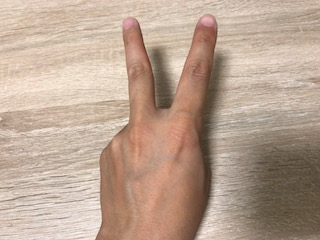

In [55]:
from IPython.display import Image as IPImage
from IPython.display import display_jpeg
display_jpeg(IPImage('datasets/choki/choki_01.jpg'))

In [56]:
!sudo apt install tree

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tree is already the newest version (1.7.0-5).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [57]:
!tree -d datasets

datasets
├── choki
├── gu
└── pa

3 directories


In [58]:
dataset_original_dir = "datasets"
dataset_root_dir = "target_datasets"

In [59]:
!wget https://raw.githubusercontent.com/karaage0703/karaage-ai-book/master/util/split_train_val.py

--2022-04-02 08:38:55--  https://raw.githubusercontent.com/karaage0703/karaage-ai-book/master/util/split_train_val.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2683 (2.6K) [text/plain]
Saving to: ‘split_train_val.py.1’

split_train_val.py. 100%[===================>]   2.62K  --.-KB/s    in 0s      

2022-04-02 08:38:55 (52.8 MB/s) - ‘split_train_val.py.1’ saved [2683/2683]



In [60]:
import split_train_val

In [61]:
split_train_val.image_dir_train_val_split(
    dataset_original_dir, dataset_root_dir, train_size=0.67)

target_datasetsis already created.
target_datasets/trainis already created.
target_datasets/valis already created.
target_datasets/train/guis already created.
target_datasets/val/guis already created.
target_datasets/train/pais already created.
target_datasets/val/pais already created.
target_datasets/train/chokiis already created.
target_datasets/val/chokiis already created.
datasets/gu copy is done
datasets/pa copy is done
datasets/choki copy is done
processing is done


In [106]:
!rm -rf target_datasets/train/.git target_datasets/val/.git
!tree -d target_datasets -a

target_datasets
├── train
│   ├── choki
│   ├── gu
│   └── pa
└── val
    ├── choki
    ├── gu
    └── pa

8 directories


In [107]:
train_dir = "target_datasets/train"
val_dir = "target_datasets/val"

In [65]:
import os
import sys
import shutil

In [108]:
backup_dir ="./model"

In [109]:
labels = [d for d in os.listdir(dataset_original_dir)
  if os.path.isdir(os.path.join(dataset_original_dir, d))]
labels.sort()

if os.path.exists(backup_dir):
  shutil.rmtree(backup_dir)
os.makedirs(backup_dir)

with open(backup_dir + '/labels.txt', 'w') as f:
  for label in labels:
    f.write(label + "\n")

NUM_CLASSES = len(labels)
print(f"class number={str(NUM_CLASSES)}")

class number=3


In [111]:
!cat ./model/labels.txt
!ls ./model

choki
gu
pa
labels.txt


In [112]:
### create AI model ###

In [113]:
%tensorflow_version 2.x
import tensorflow as tf
print(tf.__version__)

2.8.0


In [114]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.utils import array_to_img, img_to_array, load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [115]:
labels = []
with open(backup_dir + '/labels.txt', 'r') as f:
  for line in f:
    labels.append(line.rstrip())
print(labels)
NUM_CLASSES = len(labels)

['choki', 'gu', 'pa']


In [130]:
# hyper-parameters
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 8

In [131]:
# dataset preprocess
IMAGE_SIZE = 64
train_data_gen = ImageDataGenerator(rescale=1./255)
val_data_gen = ImageDataGenerator(rescale=1./255)

In [132]:
train_data = train_data_gen.flow_from_directory(
    train_dir, target_size=(IMAGE_SIZE, IMAGE_SIZE),
    color_mode='rgb', batch_size=BATCH_SIZE,
    class_mode='categorical', shuffle=True)
validation_data = val_data_gen.flow_from_directory(
    val_dir, target_size=(IMAGE_SIZE, IMAGE_SIZE),
    color_mode='rgb', batch_size=BATCH_SIZE,
    class_mode='categorical', shuffle=True)

!ls target_datasets

Found 150 images belonging to 3 classes.
Found 100 images belonging to 3 classes.
train  val


In [133]:
# check iterated data
(image_data, label_data) = train_data.next()
print(image_data.shape)
print(label_data.shape)
print(label_data)

(8, 64, 64, 3)
(8, 3)
[[1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]]


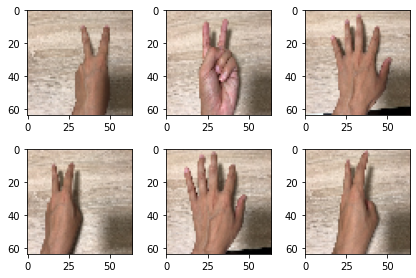

In [134]:
import matplotlib.pyplot as plt
image_numb = 6
for i in range(image_numb):
  ax = plt.subplot(image_numb // 3, 3, i + 1)
  plt.tight_layout()
  ax.set_title(str())
  plt.imshow(image_data[i])

In [135]:
# AI model
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(NUM_CLASSES))
model.add(Activation('softmax'))

opt = tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE)
model.compile(opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [136]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 64, 64, 32)        896       
                                                                 
 activation_20 (Activation)  (None, 64, 64, 32)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 62, 62, 64)        18496     
                                                                 
 activation_21 (Activation)  (None, 62, 62, 64)        0         
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 31, 31, 64)       0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 31, 31, 64)        0         
                                                      

In [137]:
# train model
%%time
history = model.fit(train_data, epochs=EPOCHS, validation_data=validation_data, verbose=1)

Epoch 1/50
19/19 [==============================] - 1s 42ms/step - loss: 1.7194 - accuracy: 0.3333 - val_loss: 0.9999 - val_accuracy: 0.6300
Epoch 2/50
19/19 [==============================] - 1s 34ms/step - loss: 0.9167 - accuracy: 0.6333 - val_loss: 0.6748 - val_accuracy: 0.8300
Epoch 3/50
19/19 [==============================] - 1s 33ms/step - loss: 0.6597 - accuracy: 0.7400 - val_loss: 0.4066 - val_accuracy: 0.9100
Epoch 4/50
19/19 [==============================] - 1s 33ms/step - loss: 0.4072 - accuracy: 0.8800 - val_loss: 0.2871 - val_accuracy: 0.9400
Epoch 5/50
19/19 [==============================] - 1s 33ms/step - loss: 0.2245 - accuracy: 0.9333 - val_loss: 0.1732 - val_accuracy: 0.9500
Epoch 6/50
19/19 [==============================] - 1s 33ms/step - loss: 0.1515 - accuracy: 0.9600 - val_loss: 0.0824 - val_accuracy: 0.9800
Epoch 7/50
19/19 [==============================] - 1s 33ms/step - loss: 0.1008 - accuracy: 0.9733 - val_loss: 0.0535 - val_accuracy: 0.9900
Epoch 8/50
19

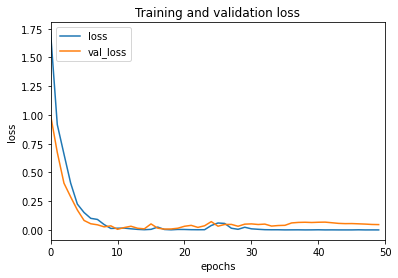

In [138]:
# visualization
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and validation loss')
plt.ylabel('loss')
plt.xlim([0.0, EPOCHS])
plt.xlabel('epochs')
plt.legend(['loss', 'val_loss'], loc='upper left')
plt.show()

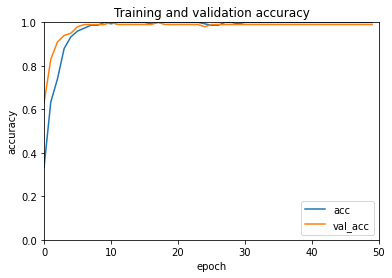

In [140]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.xlim([0.0, EPOCHS])
plt.ylim([0.0, 1.0])
plt.legend(['acc', 'val_acc'], loc='lower right')
plt.show()